In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
import arff as arf

OTRO

In [2]:
file_path = 'final-dataset.arff'
#file_path = 'ddos_data_dataset.arff'
file = open(file_path)

decoder = arf.ArffDecoder()
data = decoder.decode(file, encode_nominal=True)


In [ ]:
df = pd.DataFrame(data)
df.head()

In [3]:
vals = [val[0:-1] for val in data['data']]
da=labels = [lab[-1] for lab in data['data']]

In [4]:
da=set(labels)
brac=600
templ=[]
tempd=[]
for i in da:
    coun=0
    while coun<brac:
        for j in range(len(labels)):
            if labels[j]:
                templ.append(labels[j]) 
                tempd.append(vals[j])
                coun+=1
            if coun==brac:
                break
vals=tempd
labels=templ

In [5]:
l = len(vals)
print(l)

3000


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(vals, labels, stratify=labels, test_size=0.2, random_state=0)

In [7]:
#print(X_train.shape)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=np.array(Y_train)
y_test=np.array(Y_test)
#(2400, 23)

In [8]:
model=SVC(kernel='sigmoid', gamma='auto') 
model.fit(x_train,y_train)

SVC(gamma='auto', kernel='sigmoid')

In [9]:
y_pred=model.predict(x_test)

In [10]:
print((accuracy_score (y_pred,y_test))*100, "%")

88.66666666666667 %


In [11]:
model1=KNeighborsClassifier(n_neighbors=5) 
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred1=model1.predict(x_test)

In [13]:
print((accuracy_score (y_pred1,y_test))*100,"%")

98.16666666666667 %


In [14]:
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred2=model2.predict(x_test)

In [16]:
print((accuracy_score (y_pred2,y_test))*100, "%")

90.16666666666666 %


## Blending Technique

In [17]:
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2, random_state=0)

In [18]:
columns = [ 'SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE', 
            'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
            'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT IN', 'PKT_OUT', 
            'PKT_R', 'PKT_DELAY_NODE', 'PKT RATE', 'BYTE RATE', 'PKT_AVG_SIZE',
            'UTILIZATION', 'PKT_DELAY', 'PKT SEND TIME', 'PKT_RESEVED TIME', 
            'FIRST PKT SENT', 'LAST_PKT RESEVED']

In [19]:
print(train_x.shape, val_x.shape)

(1920, 27) (480, 27)


In [20]:
model1=SVC (kernel='sigmoid', gamma='auto')
model1.fit(train_x, train_y)
y_val_pred1=model1.predict(val_x) 
y_val_pred1=pd.DataFrame (y_val_pred1) 
y_test_pred1=model1.predict(x_test) 
y_test_pred1=pd.DataFrame (y_test_pred1)

In [21]:
model2=KNeighborsClassifier (n_neighbors=5)
model2.fit(train_x, train_y)
y_val_pred2=model2.predict(val_x) 
y_val_pred2=pd.DataFrame(y_val_pred2) 
y_test_pred2=model2.predict(x_test) 
y_test_pred2=pd.DataFrame(y_test_pred2)

In [22]:
model3=GaussianNB()
model3.fit(train_x, train_y)
y_val_pred3=model3.predict(val_x)
y_val_pred3=pd.DataFrame (y_val_pred3) 
y_test_pred3=model3.predict(x_test) 
y_test_pred3=pd.DataFrame(y_test_pred3)

In [23]:
val_input=pd.concat([pd.DataFrame(val_x,columns=columns),y_val_pred1,y_val_pred2,y_val_pred3], axis=1) 
test_input=pd.concat([pd.DataFrame(x_test,columns=columns),y_test_pred1,y_test_pred2,y_test_pred3], axis=1)

In [24]:
model=RandomForestClassifier(n_estimators=200)

In [25]:
val_input = pd.concat([pd.DataFrame(val_x), 
                       y_val_pred1,
                       y_val_pred2,
                       y_val_pred3], axis=1)

test_input = pd.concat([pd.DataFrame(x_test),  
                        y_test_pred1,
                        y_test_pred2,
                        y_test_pred3], axis=1)
model.fit(val_input,val_y)

RandomForestClassifier(n_estimators=200)

In [26]:
print((model.score(test_input,y_test))*100,"%")

97.5 %


In [27]:
# Predicciones en el conjunto test
y_pred = model.predict(test_input)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
matriz = confusion_matrix(y_test, y_pred)
print(matriz)

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       528
           2       0.77      0.83      0.80        36
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        15

    accuracy                           0.97       600
   macro avg       0.94      0.95      0.95       600
weighted avg       0.98      0.97      0.98       600

[[519   9   0   0]
 [  6  30   0   0]
 [  0   0  21   0]
 [  0   0   0  15]]


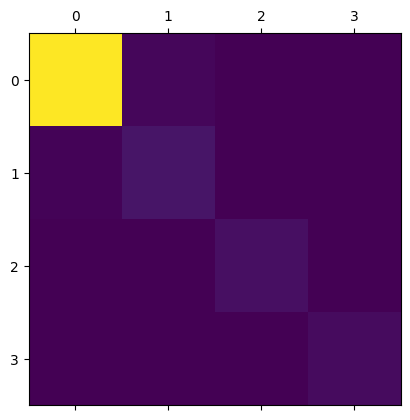

In [28]:
plt.matshow(matriz)
plt.show()

<Axes: >

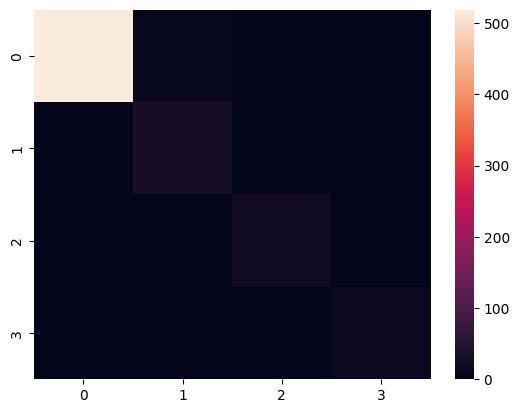

In [29]:
sns.heatmap(matriz)